<a href="https://colab.research.google.com/github/sonmoogu/AI12th_Section1_Project/blob/main/ai12_section1_project_%EC%86%90%EB%AC%B4%EA%B3%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

# 1. 데이터 전처리

In [3]:
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

# row 와 column 생략 없이 출력
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

data = 'vgames2.csv'
df = pd.read_csv(data)
#df.head(20)

#df.isnull().sum()
# 결측치 검사 결과:  "['Year'] = 271개,  ['Genre'] = 50개 , ['Publisher'] = 58개"

df = df.dropna().reset_index()

df = df.drop(df.iloc[:,0:2], axis = 1)
df.head(11)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


``` python
df.info()
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 

Sales가 string type으로 되있으므로
int나 float type으로 바꿔준다
```

In [4]:
# Sales column 기본단위 Million이라 가정, K(천단위) 포함하는 값 추출
# NA_Sales ~ Other_Sales
contains_K = df.loc[:, 'NA_Sales': 'Other_Sales'].apply(lambda x: x.str.contains('K'), axis = 1)
contains_K.head(11)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [5]:
# Sales column → float로
def str_to_float(str):
  return float(str.replace('M', '').replace('K', ''))

# Year column -> int로
def float_to_int(str):
  return int(str)

# Sales column들 단위 통일
sales = df.loc[:, 'NA_Sales': 'Other_Sales']
sales = sales.applymap(str_to_float)

for continent in contains_K:
  for idx in range(len(contains_K)):
    if contains_K[continent][idx] == 1:
      sales[continent][idx] = sales[continent][idx] * 0.001

sales.head(11)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0.00,0.00,0.00
1,0.17,0.00,0.00,0.01
2,0.00,0.00,0.02,0.00
3,0.04,0.00,0.00,0.00
4,0.12,0.09,0.00,0.04
5,0.00,0.00,0.14,0.00
6,0.02,0.01,0.00,0.00
7,0.07,0.00,0.11,0.01
8,0.00,0.00,0.04,0.00
9,0.04,0.03,0.00,0.01


In [6]:
# 원본 DataFrame에 변경된 값 적용
df.loc[:, 'NA_Sales': 'Other_Sales'] = sales

df.head(11)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


In [7]:
# 전세계 Sales 합 계산, 연도 type 변경

df['Sum_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df['Year'] = df.Year.apply(float_to_int)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# 연도별 이상치 값 변경
year_condition = df['Year'] < 100
df[year_condition].Year

72        9
79       97
210      11
299      15
758       3
894      96
1001      9
1204      3
1343      6
1388      9
1656      8
2206      1
2383     96
2408      6
2421      5
2497      4
2790      9
2965     11
2988     10
3051      8
3423     98
3671      6
3801      7
3929     16
3995      9
4229     10
4274     86
4625     14
4644      5
4698      3
4705     95
4737     95
5083     15
5200      3
5824     11
5989     10
6005      8
6033     11
6065     16
6758     14
6912      6
7032      8
7038     15
7215      8
7406     15
7451      6
7477     10
7689      9
7983      2
8030     16
8341      3
8379     13
8412      6
8507      1
8591      3
8664     11
8735      3
8751      8
8902      7
9094      0
9109     11
9143      9
9700      9
10113    97
10151     9
10199    11
10200     6
10410    10
10493    96
10596    12
10703    13
10939     2
11010     5
11037    16
11104    95
11283    11
11712    10
12124    12
12234     7
12372     5
12599    10
13447     9
13855     4
1426

In [8]:
for idx in range(len(year_condition)):
  if year_condition[idx] == True: # df['year'] < 100일 경우 전체
    if df.Year[idx] >= 50:
      df.Year[idx] = df.Year[idx] + 1900
    else:
      df.Year[idx] = df.Year[idx] + 2000

df[year_condition].Year

72       2009
79       1997
210      2011
299      2015
758      2003
894      1996
1001     2009
1204     2003
1343     2006
1388     2009
1656     2008
2206     2001
2383     1996
2408     2006
2421     2005
2497     2004
2790     2009
2965     2011
2988     2010
3051     2008
3423     1998
3671     2006
3801     2007
3929     2016
3995     2009
4229     2010
4274     1986
4625     2014
4644     2005
4698     2003
4705     1995
4737     1995
5083     2015
5200     2003
5824     2011
5989     2010
6005     2008
6033     2011
6065     2016
6758     2014
6912     2006
7032     2008
7038     2015
7215     2008
7406     2015
7451     2006
7477     2010
7689     2009
7983     2002
8030     2016
8341     2003
8379     2013
8412     2006
8507     2001
8591     2003
8664     2011
8735     2003
8751     2008
8902     2007
9094     2000
9109     2011
9143     2009
9700     2009
10113    1997
10151    2009
10199    2011
10200    2006
10410    2010
10493    1996
10596    2012
10703    2013
10939 

In [9]:
import numpy as np
# 원본 Year와 Modified Year 구분 열 추가

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# 원본 Data와 같은지 아닌지 판별 column 추가
# 원본 데이터 Year에서 바뀌었으면 Yes, 아니면 No
df.insert(3, 'Year_Changed?', np.where(year_condition.values == True, 'Yes', 'No'))

# 수정된 Year Column만 확인!
df.loc[(df['Year_Changed?'] == 'Yes')]

,Name,Platform,Year,Year_Changed?,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
72,Age of Empires III: Complete Collection,PC,2009,Yes,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03,0.16
79,Treasures of the Deep,PS,1997,Yes,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,0.18
210,NASCAR Unleashed,PS3,2011,Yes,Racing,Activision,0.09,0.00,0.00,0.01,0.10
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,2015,Yes,Action,Little Orbit,0.00,0.02,0.00,0.00,0.02
758,NASCAR Thunder 2004,PS2,2003,Yes,Racing,Electronic Arts,0.53,0.41,0.00,0.14,1.08
894,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,1996,Yes,Racing,ASCII Entertainment,0.00,0.00,0.90,0.00,0.90
1001,Wolfenstein,PC,2009,Yes,Shooter,Activision,0.01,0.03,0.00,0.01,0.05
1204,Ratchet & Clank: Going Commando,PS2,2003,Yes,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25,2.78
1343,LEGO Star Wars II: The Original Trilogy,PS2,2006,Yes,Action,LucasArts,1.85,0.64,0.01,0.19,2.69
1388,Rogue Warrior,PS3,2009,Yes,Shooter,Bethesda Softworks,0.11,0.02,0.00,0.01,0.14


# 2. 필수 문제

## 1) 지역에 따라서 선호하는 게임 장르가 다를까

In [10]:
# 전처리 후 csv파일 확인해보기
df.to_csv("../content/vgames_modified.csv", sep=',' , encoding='utf-8')

In [11]:
# Genre별 
df_Q_1 = df.loc[:, 'Genre': 'Other_Sales']
df_Q_1 = df_Q_1.drop('Publisher', axis = 1)

df_Q_1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16236,Platform,0.15,0.04,0.00,0.01
16237,Action,0.01,0.00,0.00,0.00
16238,Sports,0.44,0.19,0.03,0.13
16239,Action,0.05,0.05,0.25,0.03


In [12]:
#지역별 Genre의 누적 판매량 합계

Sales_by_Genre = df_Q_1.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index('Genre')
Sales_by_Genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


In [13]:
# Chi-Square 를 통한 동질성 검사

from scipy.stats import chi2_contingency

Genre_chi = Sales_by_Genre.set_index('Genre')

chi2, p, dof, exp = chi2_contingency(Genre_chi)

chi_form = 'Test Statistic: {}\np-value: {}\n자유도: {}'

print(exp)
print('\n')
print(chi_form.format(chi2, p, dof))

# Chi-Square 동질성 Test.

# 귀무가설(H0) : 각 지역별 게임 장르 선호도는 차이가 없다.
# 대안가설(Ha) : 각 지역별 게임 장르 선호도는 차이가 있다.

# p-value: 9.635373883688875e-123 <<<< 0.05 : 귀무가설 기각
# 따라서 각 지역별 게임 장르 선호도는 차이가 있다.

[[842.66837143 468.29974503 248.7462714  153.26561214]
 [115.12174823  63.97710792  33.98265154  20.93849231]
 [218.19118114 121.25633043  64.40759449  39.68489393]
 [383.55878598 213.15678595 113.22226051  69.76216756]
 [407.31414544 226.35845479 120.23457673  74.08282303]
 [118.42260683  65.81150838  34.95702805  21.53885674]
 [355.44491575 197.53294304 104.92336069  64.64878052]
 [443.48093003 246.45757869 130.91060674  80.66088454]
 [504.10653576 280.14930922 148.80660697  91.68754804]
 [191.49899218 106.42256462  56.52835908  34.83008412]
 [642.13752173 356.85786709 189.55180907 116.79280211]
 [ 85.09426549  47.28980484  25.11887472  15.47705495]]


Test Statistic: 684.336340516928
p-value: 9.635373883688875e-123
자유도: 33


In [14]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# 지역별 게임 장르 선호도가 다르다

fig = go.Figure()

fig.add_trace(go.Bar(x = Sales_by_Genre['Genre'],
                     y = Sales_by_Genre['NA_Sales'],
                     name = 'NA 지역 장르 선호도',
                     marker = {'color': 'crimson'}))

fig.add_trace(go.Bar(x = Sales_by_Genre['Genre'],
                     y = Sales_by_Genre['EU_Sales'],
                     name = 'EU 지역 장르 선호도',
                     marker = {'color': 'lime'}))

fig.add_trace(go.Bar(x = Sales_by_Genre['Genre'],
                     y = Sales_by_Genre['JP_Sales'],
                     name = 'JP 지역 장르 선호도',
                     marker = {'color': 'peru'}))

fig.add_trace(go.Bar(x = Sales_by_Genre['Genre'],
                     y = Sales_by_Genre['Other_Sales'],
                     name = 'Other 지역 장르 선호도',
                     marker = {'color': 'honeydew'}))

fig.update_layout(updatemenus = 
                 [dict(type = 'buttons',
                     direction = 'up',
                     active = 0,
                     x = 1,
                     y = 1.2,
                     buttons = list([
                        dict(label = 'Global',
                              method = 'update',
                              args = [{'visible': [True,True,True,True]},
                                     {'title':'전세계 Genre 선호도'}])
                                   ])
                     )
                 ])

fig.update_layout(title_text = '전세계 Genre 선호도', barmode = 'group')
# 오른쪽 label 버튼 누르면서 특정 지역만 plot 가능

### 분석

**상위 5개 항목 분석**

*   NA 장르 선호 순서: ***Action > Sports > Shooter*** > Platform > Misc
*   EU 장르 선호 순서: ***Action > Sports > Shooter*** > Racing > Misc
*   JP 장르 선호 순서: Role-Playing > Action > Sports > Platform > Misc
*   Other 장르 선호 순서: ***Action > Sports > Shooter*** > Racing > Misc

``` python

#결론:

#① NA, EU, Other 지역의 Top 3 장르의 선호도는 같으며, Action의 선호도가 가장 높다

#② JP지역의 경우 Role-playing이 가장 선호도가 높다

#③ 4지역 모두 Top5 Genre 중 Misc의 장르 선호도가 가장 낮다

```

## 2) 연도별 게임의 트렌드가 있을까

### 1.출시년에 따른 총 판매량 트랜드

In [15]:
df_Q_2_1 = df.loc[:, 'Year': 'Sum_Sales']
df_Q_2_1 = df_Q_2_1.drop('Publisher', axis = 1)
df_Q_2_1 = df_Q_2_1.drop('Year_Changed?', axis = 1)

df_Q_2_1

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
0,2008,Action,0.04,0.00,0.00,0.00,0.04
1,2009,Action,0.17,0.00,0.00,0.01,0.18
2,2010,Adventure,0.00,0.00,0.02,0.00,0.02
3,2010,Misc,0.04,0.00,0.00,0.00,0.04
4,2010,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...
16236,2006,Platform,0.15,0.04,0.00,0.01,0.20
16237,2005,Action,0.01,0.00,0.00,0.00,0.01
16238,2015,Sports,0.44,0.19,0.03,0.13,0.79
16239,2013,Action,0.05,0.05,0.25,0.03,0.38


In [16]:
Sales_Year = df_Q_2_1.groupby(['Year', 'Genre'])['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Sum_Sales'].sum().reset_index(['Year','Genre'])
Sales_Year = Sales_Year.sort_values('Year', ascending=True) #연별로 오름차순 정렬
Sales_Year.head(10)

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
0,1980,Action,0.32,0.02,0.0,0.00,0.34
1,1980,Fighting,0.72,0.04,0.0,0.01,0.77
2,1980,Misc,2.53,0.15,0.0,0.02,2.70
3,1980,Shooter,6.56,0.43,0.0,0.08,7.07
9,1981,Simulation,0.42,0.02,0.0,0.00,0.44
8,1981,Shooter,9.37,0.56,0.0,0.09,10.02
7,1981,Racing,0.45,0.03,0.0,0.00,0.48
10,1981,Sports,0.74,0.04,0.0,0.00,0.78
5,1981,Platform,6.47,0.37,0.0,0.08,6.92
4,1981,Action,13.86,0.81,0.0,0.12,14.79


In [17]:
fig = go.Figure()

regions = ['NA', 'EU', 'JP', 'Other']
region_sales_sufix = '_Sales'

for region in regions:

  fig.add_trace(
    go.Bar(
      x = Sales_Year['Year'],
      y = Sales_Year[region + region_sales_sufix],
      name = region
  ))

  fig.add_trace(
    go.Bar(
      x = Sales_Year['Genre'],
      y = Sales_Year[region + region_sales_sufix],
      name = region
  ))

fig.update_layout(updatemenus = 
                 [dict(type = 'buttons',
                     direction = 'right',
                     active = 0,
                     x = 1,
                     y = 1.2,
                     buttons = list([
                        dict(label = '연도별',
                              method = 'update',
                              args = [{'visible': [True,False]},
                                      {'title':'연별 총 판매량 트랜드'}],
                                      ),
                        dict(label = '장르별',
                              method = 'update',
                              args = [{'visible': [False,True]},
                                     {'title':'장르별 총 판매량 트랜드'}]),      
                                   ])
                     )
                 ])

fig.update_layout(barmode = 'group')
fig.update_xaxes(type='category')
fig.show()

#### 분석

**1980년 ~ 2020년 지역별 최고 총 판매량 분석 결과**

*   NA지역: 2008년 게임 판매량 3억 5천만
*   EU지역: 2006년 게임 판매량 1억 9천만
*   JP지역: 2006년 게임 판매량 7천 1백만
*   Other지역: 2008년 게임 판매량 8천 1백만

**1980년 ~ 2020년 지역별 Top3 총 판매량에 따른 장르 순위 분석 결과**

*   NA지역: ***Action > Sports > Shooter***
*   EU지역: ***Action > Sports > Shooter***
*   JP지역: ***Role-Playing > Action > Sports***
*   Other지역: ***Action > Sports > Shooter***

``` python

#∴ 지역별 장르 선호도 = 총 판매량에 따른 지역별 장르 선호도

```

### 2.연도별 장르 소비 선호도


In [18]:
import numpy as np

# 연도별 컬럼 추가
group = [1980, 1990, 2000, 2010, 2020]

df_Q_2_2 = df.loc[:, 'Year': 'Sum_Sales']
df_Q_2_2 = df_Q_2_2.drop('Publisher', axis = 1)

df_Q_2_2['Year_group'] = np.digitize(df.Year, group)

for idx in range(len(df_Q_2_2.Year_group)):
  if df_Q_2_2.Year_group[idx] == 1:
    df_Q_2_2.Year_group[idx] = 1980
  elif df_Q_2_2.Year_group[idx] == 2:
    df_Q_2_2.Year_group[idx] = 1990
  elif df_Q_2_2.Year_group[idx] == 3:
    df_Q_2_2.Year_group[idx] = 2000
  elif df_Q_2_2.Year_group[idx] == 4:
    df_Q_2_2.Year_group[idx] = 2010
  elif df_Q_2_2.Year_group[idx] == 5:
    df_Q_2_2.Year_group[idx] = 2020

df_Q_2_2 = df_Q_2_2.sort_values('Year_group', ascending=True)
df_Q_2_2

,Year,Year_Changed?,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales,Year_group
5624,1985,No,Fighting,0.00,0.00,1.05,0.00,1.05,1980
1492,1981,No,Action,0.29,0.02,0.00,0.00,0.31,1980
8436,1981,No,Sports,0.24,0.01,0.00,0.00,0.25,1980
14359,1981,No,Action,0.21,0.01,0.00,0.00,0.22,1980
6054,1988,No,Sports,1.27,0.32,0.78,0.05,2.42,1980
...,...,...,...,...,...,...,...,...,...
4076,2010,No,Action,0.51,0.42,0.00,0.17,1.10,2010
4077,2012,No,Puzzle,0.00,0.05,0.00,0.01,0.06,2010
4080,2016,No,Sports,0.54,0.04,0.00,0.07,0.65,2010
4081,2012,No,Misc,0.13,0.02,0.00,0.01,0.16,2010


In [19]:
# 연도별 장르 소비 선호도
# Sales Feature를 누적 판매량으로 추정했을 때, 각 연도별 얼마나 판매가 되었는지 정확히 알 수 없음.
# 동등한 비율로 나눠서 계산한다

df_test = pd.concat([df_Q_2_2.Genre, df_Q_2_2.Year_group, df_Q_2_2.Sum_Sales], axis = 1)

df_test['Stacked_Years_Group'] = 2021 - df_test.Year_group

df_test['Sales_Per_Year_Group'] = df_test.Sum_Sales / df_test.Stacked_Years_Group

grouping = df_test['Sales_Per_Year_Group'].groupby([df_test['Year_group'], df_test['Genre']])

sum = grouping.sum()

problem2 = sum.unstack().fillna(0).reset_index('Year_group')

for column in problem2.columns[1 :]:
  problem2[column] = problem2[column] / df_test['Stacked_Years_Group']

# 비율로 계산하기 위해 각 연도별 판매량의 합으로 나눔.

problem2['Sum'] = (problem2['Action'] + problem2['Adventure'] + problem2['Fighting'] + problem2['Misc'] + problem2['Platform']
                    + problem2['Puzzle'] + problem2['Racing'] + problem2['Role-Playing'] + problem2['Shooter'] + problem2['Simulation']
                    + problem2['Sports'] + problem2['Strategy'])

for column in problem2.columns[1 : ]:
  problem2[column] = problem2[column] / problem2['Sum']

problem2

Genre,Year_group,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Sum
0,1980,0.135911,0.012713,0.019256,0.022448,0.325177,0.166897,0.032183,0.040561,0.158971,0.001356,0.084526,0.000000,1.0
1,1990,0.109121,0.035132,0.096856,0.049742,0.163795,0.030537,0.116696,0.143328,0.054023,0.040810,0.114861,0.045099,1.0
2,2000,0.184964,0.026795,0.050139,0.103748,0.081547,0.025553,0.094961,0.089367,0.093975,0.057592,0.174054,0.017305,1.0
3,2010,0.268755,0.024423,0.032723,0.092033,0.048457,0.008501,0.049625,0.116914,0.185688,0.028417,0.130155,0.014309,1.0
4,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0


In [20]:
# 연도별 장르 출시 선호도를 보기 위한 cross tabulation
ctab = pd.crosstab(df_Q_2_2['Year_group'], df['Genre'])
ctab.reset_index(inplace=True)

ctab

Genre,Year_group,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980,66,2,4,8,33,19,8,9,30,3,22,0
1,1990,161,97,193,115,125,71,181,171,137,86,304,123
2,2000,1579,631,442,997,565,361,797,729,718,551,1404,379
3,2010,1434,538,196,561,150,115,233,556,395,205,569,167
4,2020,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
chi2, p, dof, exp = chi2_contingency(ctab)

chi_form = 'Test Statistic: {}\np-value: {}\n자유도: {}'

print(exp)
print('\n')
print(chi_form.format(chi2, p, dof))

# Chi-Square 동질성 Test.

# 귀무가설(H0) : 각 연도별 게임 장르 선호도는 차이가 없다.
# 대안가설(Ha) : 각 연도별 게임 장르 선호도는 차이가 있다.

# p-value: 0 < 0.05 : 귀무가설 기각
# 따라서 각 연도별 게임 장르 선호도는 차이가 있다.

[[ 832.28535498  269.66045501  105.53378301   69.49582714  139.90716817
    72.65851149   47.10735109  101.45558477  121.9298045   106.53252544
    70.41134103  191.34240311   55.67989025]
 [1430.58572463  463.50977478  181.39826988  119.45390801  240.48146031
   124.89013376   80.97115201  174.38839983  209.58080866  183.11497275
   121.0275523   328.89165809   95.70618498]
 [4250.21912275 1377.07099577  538.92778476  354.89329675  714.46183453
   371.04412942  240.56240235  518.10171106  622.65710148  544.02804771
   359.56853778  977.12537632  284.33965931]
 [2716.74097786  880.22407683  344.48275599  226.84787165  456.68415838
   237.17148737  153.76753935  331.1707252   398.00255326  347.74284517
   229.83628673  624.57875081  181.74997142]
 [ 770.16881979  249.53469761   97.65740635   64.30909645  129.46537861
    67.23573797   43.5915552    93.88357913  112.8297321    98.58160893
    65.15628215  177.06181167   51.52429404]]


Test Statistic: 9354.816732267813
p-value: 0.0
자유도: 

In [22]:
problem2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year_group    5 non-null      int64  
 1   Action        5 non-null      float64
 2   Adventure     5 non-null      float64
 3   Fighting      5 non-null      float64
 4   Misc          5 non-null      float64
 5   Platform      5 non-null      float64
 6   Puzzle        5 non-null      float64
 7   Racing        5 non-null      float64
 8   Role-Playing  5 non-null      float64
 9   Shooter       5 non-null      float64
 10  Simulation    5 non-null      float64
 11  Sports        5 non-null      float64
 12  Strategy      5 non-null      float64
 13  Sum           5 non-null      float64
dtypes: float64(13), int64(1)
memory usage: 688.0 bytes


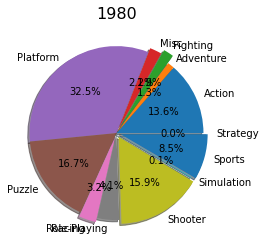

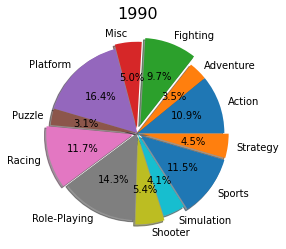

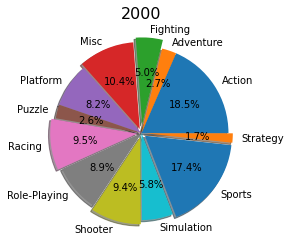

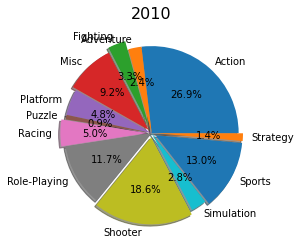

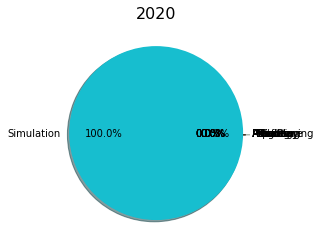

In [23]:
# pie plot으로 시각화
import matplotlib.pyplot as plt
%matplotlib inline

explode = [0, 0, 0.1, 0.05, 0, 0, 0.05, 0, 0.05, 0, 0.05, 0.05]

labels_3 = []
for column in problem2.columns:
  labels_3.append(column)

for idx in range(len(problem2)):
  ratio = problem2.iloc[idx, 1:-1]
  
  plt.pie(ratio, labels=labels_3[1:-1], autopct='%.1f%%', explode=explode, shadow=True)
  plt.title(problem2.Year_group[idx], fontsize=16)
  plt.show()

#### 분석

**1980년 ~ 2020년대 연도별 전세계 Top3 장르 소비 선호도**


``` python

*   1980년대: Platform > Puzzle > Shooter
*   1990년대: Platform > Role-Playing > Racing
*   2000년대: Action > Sports > Misc
*   2010년대: Action > Shooter > Sports
*   2020년대: Simulation

# 8~90년대에는 Platform 장르가 전세계적으로 가장 많이 소비 됐고 2000년대 들어서면서 부터 Action장르가 가장 많이 소비됐음을 알수 있습니다

# 2020년대는 2020년 데이터가 1개 밖에 데이터에 크롤링 되있지 않았으므로 Simulation 장르가 100%로 표시됨을 알 수 있습니다.

```

## 3) 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [24]:
# 출고량이 가장 높은 게임순 정렬

df_test3 = pd.concat([df['Name'], df['Year'], df['Genre'], df['Platform'], df['Sum_Sales']], axis=1)
df_test3 = df_test3.sort_values(by=['Sum_Sales'], ascending=False)
df_test3 = df_test3.reset_index(drop=True)

df_test3

,Name,Year,Genre,Platform,Sum_Sales
0,Wii Sports,2006,Sports,Wii,82.74
1,Super Mario Bros.,1985,Platform,NES,40.24
2,Mario Kart Wii,2008,Racing,Wii,35.83
3,Wii Sports Resort,2009,Sports,Wii,33.00
4,Pokemon Red/Pokemon Blue,1996,Role-Playing,GB,31.38
...,...,...,...,...,...
16236,Cities: Skylines Snowfall,2016,Simulation,PC,0.01
16237,Majesty 2 Collection,2011,Strategy,PC,0.01
16238,Robopon 2: Cross Version,2001,Role-Playing,GBA,0.01
16239,Uchida Yasuou Mystery: Meitantei Senken Mitsuh...,2009,Adventure,DS,0.01


In [25]:
# 가장 많이 팔린 게임들의 Groupby
df_test3_genre = df_test3.groupby(df_test3['Name']).size().sort_values(ascending=False)
df_test3_platform = df_test3.groupby(df_test3['Platform']).size().sort_values(ascending=False)

In [28]:
import plotly.express as px
import numpy as np

sum2 = df_test3['Sum_Sales'].groupby(df_test3['Name'].head(10)).sum().sort_values(ascending=False)
sum2 = sum2.to_frame().reset_index('Name')

px.bar(
    sum2,
    x = 'Name',
    y = 'Sum_Sales',
    color = 'Name',    
    title = '출고량이 가장 많은 상위 10개 게임 타이틀의 출고량'
)

In [29]:
sum2

,Name,Sum_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.83
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.38
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.01
8,New Super Mario Bros. Wii,28.61
9,Duck Hunt,28.31


In [30]:
sum2_plat = df_test3['Sum_Sales'].groupby(df_test3['Platform']).sum().sort_values(ascending=False)
sum2_plat = sum2_plat.to_frame().reset_index('Platform')

px.bar(
    sum2_plat,
    x = 'Platform',
    y = 'Sum_Sales',
    color = 'Platform',    
    title = '출고량이 가장 많은 게임 플랫폼'
)

In [31]:
sum2_plat

,Platform,Sum_Sales
0,PS2,1222.44
1,X360,968.59
2,PS3,946.74
3,Wii,900.15
4,DS,817.19
5,PS,725.16
6,GBA,304.76
7,PSP,290.84
8,PS4,275.78
9,GB,254.43


## 4) 장르 - 플랫폼 - 게임 제작사 Sale 비중 분포도 시각화

In [32]:
df_Q_4 = df.loc[:, 'Genre': 'Sum_Sales']
df_Q_4 = df_Q_4.drop('Publisher', axis = 1)

df_Q_4

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
0,Action,0.04,0.00,0.00,0.00,0.04
1,Action,0.17,0.00,0.00,0.01,0.18
2,Adventure,0.00,0.00,0.02,0.00,0.02
3,Misc,0.04,0.00,0.00,0.00,0.04
4,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...
16236,Platform,0.15,0.04,0.00,0.01,0.20
16237,Action,0.01,0.00,0.00,0.00,0.01
16238,Sports,0.44,0.19,0.03,0.13,0.79
16239,Action,0.05,0.05,0.25,0.03,0.38


In [33]:
genre_total_top = df_Q_4.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Sum_Sales'].sum().reset_index('Genre')
genre_total_top = genre_total_top.sort_values('Sum_Sales', ascending=False)
genre_total_top
# genre_top = list()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
0,Action,858.75,513.64,156.60,183.99,1712.98
10,Sports,667.26,370.97,134.76,132.35,1305.34
8,Shooter,574.48,310.23,38.18,101.86,1024.75
7,Role-Playing,318.76,183.09,342.93,56.73,901.51
4,Platform,445.38,200.63,130.53,51.45,827.99
3,Misc,394.73,208.15,104.18,72.64,779.70
6,Racing,354.70,235.02,56.32,76.51,722.55
2,Fighting,220.35,99.90,87.14,36.15,443.54
9,Simulation,181.43,112.99,63.54,31.32,389.28
5,Puzzle,121.58,50.47,56.24,12.44,240.73


In [34]:
# 전세계 Genre 순위 list형으로 만들기
genre_top = list(genre_total_top.loc[genre_total_top.Sum_Sales >
                                     genre_total_top.Sum_Sales.sum() * 0.03, 'Genre'])
genre_top

['Action',
 'Sports',
 'Shooter',
 'Role-Playing',
 'Platform',
 'Misc',
 'Racing',
 'Fighting',
 'Simulation']

In [35]:
# Genre → Platform비중 파이 그래프 plot
# 상위 5개 항목

Sum_Sales = 'Sum_Sales'

platform_top = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

Genre_platform = df[(df['Genre'].isin(genre_top[:5])) &
                          (df['Platform'].isin(platform_top))]

fig = px.sunburst(Genre_platform, path=['Genre', 'Platform'],
                  values = Sum_Sales,
                  color = Sum_Sales,
                  color_continuous_scale='Rdbu',
                  title = '장르별 Platform 비중 파이 chart'
                  )
fig.show()